## Observations and Insights 

In [51]:
# kmr Pymaceuticals Matplotlib Challenge 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Look at datasets for understanding
#print(mouse_metadata)
#print(study_results)

# Combine the data into a single dataset
combined = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
#combined.head(20)
#print(len(combined))

# Display the data table for preview
print("A snapshot of the data frame after combining the mouse and study data")
combined.head(20)

A snapshot of the data frame after combining the mouse and study data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [52]:
# Check the number of mice.
print("Lines in the original study data before eliminating mice with suspect data")
print(len(combined))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
mousecount = combined['Mouse ID'].unique()
print("Number of Mice in the original study data")
print(len(mousecount))

Lines in the original study data before eliminating mice with suspect data
1893
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Number of Mice in the original study data
249


In [53]:
# Identify duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duphunter = combined.groupby(["Mouse ID"]).count()["Timepoint"]
duptable = pd.DataFrame({"Number of Timepoints": duphunter}).sort_values(["Number of Timepoints"], ascending=False)
print("Mice with duplicate data assigned to more than 10 timepoints are suspected of having data entry errors")
duptable.head(5)

Mice with duplicate data assigned to more than 10 timepoints are suspected of having data entry errors


,Number of Timepoints
Mouse ID,
g989,13
a203,10
n364,10
m546,10
m550,10


In [54]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseindex = combined.set_index("Mouse ID")
#mouseindex.head()
print("Mouse ID g989 has duplicate Tumor Volume data on four Timepoints")
mouse989 = mouseindex.loc["g989"]
mouse989.head(20)

Mouse ID g989 has duplicate Tumor Volume data on four Timepoints


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [55]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# First viable option deployed
deduped = mouseindex.drop(["g989"])
deduped.head()

# Second viable option deployed which I believe is lower integrity than eliminating the mouse completely
dropduplicates = combined.drop_duplicates(["Mouse ID"])
#dropduplicates.head()

In [56]:
# Confirm the number of mice in the clean DataFrame

# First method will not produce a length on Mouse ID
print("Lines kept from study data after eliminating the Mouse ID with suspect data:") 
print(len(deduped))
#struggle = deduped.groupby["Mouse ID"].unique()
#print(struggle)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# Second method will produce a length on Mouse ID
print("Mice count if we use the drop_duplicate methodology:")
print(len(dropduplicates)) 

# I was unable to arrive at a unique mouse count in the combined or deduped file after many attempts and syntax efforts.
#mousecount2 = combined(combined['Mouse ID']).unique().drop([g989])
#print(len(mousecount2))

Lines kept from study data after eliminating the Mouse ID with suspect data:
1880
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mice count if we use the drop_duplicate methodology:
249


## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
    # mean, median, variance, standard deviation, and SEM of the tumor volume. 
    # Assemble the resulting series into a single summary dataframe.

mean_df = deduped.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Tumor Mean")
#mean_df.head(11)
median_df = deduped.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Tumor Median")
#median_df.head(11)
variance_df = deduped.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Tumor Variance")
#variance_df.head(11)
deviation_df = deduped.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Tumor Std Dev")
#deviation_df.head(11)
sem_df = deduped.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Tumor Std Error")
#sem_df.head(11)

# Build a dataframe to present a consolidated table
summary_df = pd.DataFrame({"Tumor Mean": mean_df, "Tumor Median": median_df,"Tumor Variance": variance_df,"Tumor Std Dev": deviation_df,"Tumor Std Error": sem_df})
summary_df                          


,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor Std Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggsummary = deduped.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
    })
print(aggsummary)

             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

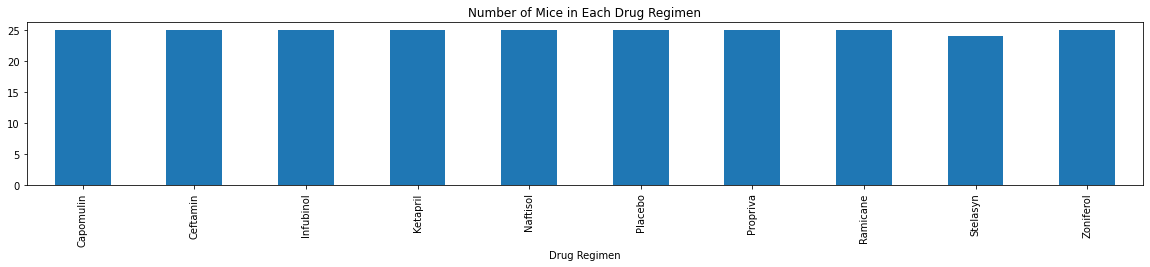

In [59]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Filter the DataFrame down only to those columns and rows desired for the chart
organized = combined[["Mouse ID", "Drug Regimen"]]
#organized.head()
organizedtwo = organized.drop_duplicates("Mouse ID")
#organizedtwo.head()
organizedthree = organizedtwo.groupby(["Drug Regimen"]).count()["Mouse ID"]
#organizedthree.head(15)

# Use DataFrame.plot() in order to create a bar chart of the data
organizedthree.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Number of Mice in Each Drug Regimen")

# Present the chart in desired format
#plt.tight_layout()
plt.show()

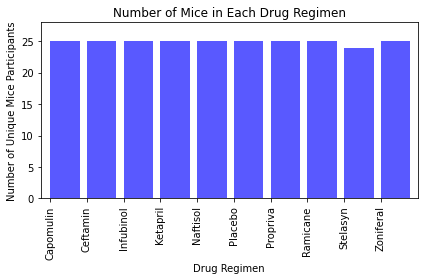

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#deduped.head()
organized = combined[["Mouse ID", "Drug Regimen"]]
#organized.head()
organizedtwo = organized.drop_duplicates("Mouse ID")
#organizedtwo.head()
organizedthree = organizedtwo.groupby(["Drug Regimen"]).count()["Mouse ID"]
#organizedthree.head(15)


x_axis = np.arange(len(organizedthree))
tick_locations = [value+0.4 for value in x_axis]
array = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferal"]
plt.xticks(x_axis, rotation = 90)
plt.bar(array, organizedthree, color='b', alpha=0.65, align="edge")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(organizedthree)+3)
plt.title("Number of Mice in Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Participants")
plt.tight_layout()
plt.show()


In [61]:
# Generate a data frame showing the distribution of female versus male mice
gender = combined[["Mouse ID", "Sex"]]
#gender.head()
gendertwo = gender.drop_duplicates("Mouse ID")
#gendertwo.head()
genderthree = gendertwo.groupby(["Sex"]).count()["Mouse ID"]
genderthree.head(3)


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

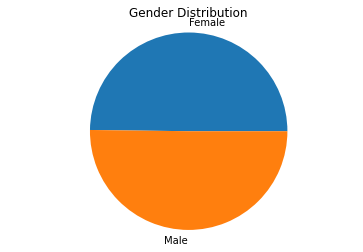

In [62]:
# Create a pie chart showing the distribution of female versus male mice using pandas
pie = genderthree.plot(kind="pie", y='Sex', title=("Gender Distribution"))
pie.set_ylabel(" ")
plt.axis("equal")
plt.show()

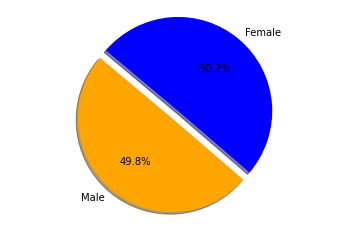

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
slice2 = ["Male", "Female"]
share2 = genderthree
colors = ["orange","blue"]
explode = (0.1,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(share2, explode=explode, labels=slice2, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
comboindex = combined.set_index("Drug Regimen")
#comboindex.head()
capomulin = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ceftamin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#capomulin.head(30)
ceftamin = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Capomulin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#ceftamin.head(30)
infubinol = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Capomulin").drop("Ceftamin").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Ramicane").drop("Stelasyn").drop("Zoniferol")
#infubinol.head(30)
ramicane = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ceftamin").drop("Infubinol").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Capomulin").drop("Stelasyn").drop("Zoniferol")
#ramicane.head(30)
combofocus = comboindex.groupby(["Drug Regimen", "Mouse ID"]).max("Timepoint").drop("Ketapril").drop("Naftisol").drop("Placebo").drop("Propriva").drop("Stelasyn").drop("Zoniferol")
#combofocus.head(30)

In [65]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds

# Uable to master the loop, went the hard way ... 
#treatment_list = [Capomulin, Ramicane, Infubinol, and Ceftamin]
#for treatment in treatment_list:
#treatmentselected == treatment_list

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
treatmentselected = "Capomulin"   
limitedone = capomulin["Tumor Volume (mm3)"]
print(treatmentselected)
quartiles = limitedone.quantile([.25,.5,.75])
#print(quartiles)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The median is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(" ")
print("Prospective outliers (if any) are as follows ...")
outlierslow = capomulin.loc[capomulin["Tumor Volume (mm3)"]<lower_bound]["Tumor Volume (mm3)"]
print(outlierslow)
outliershigh = capomulin.loc[capomulin["Tumor Volume (mm3)"]>upper_bound]["Tumor Volume (mm3)"]
print(outliershigh)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
treatmentselectedtwo = "Infubinol"   
limitedtwo = infubinol["Tumor Volume (mm3)"]
print(treatmentselectedtwo)
quartilestwo = limitedtwo.quantile([.25,.5,.75])
#print(quartiles)
lowerqtwo = quartilestwo[0.25]
upperqtwo = quartilestwo[0.75]
iqrtwo = upperqtwo-lowerqtwo
print(f"The lower quartile is: {lowerqtwo}")
print(f"The upper quartile is: {upperqtwo}")
print(f"The interquartile range is: {iqrtwo}")
print(f"The the median is: {quartilestwo[0.5]} ")
lower_boundtwo = lowerqtwo - (1.5*iqrtwo)
upper_boundtwo = upperqtwo + (1.5*iqrtwo)
print(f"Values below {lower_boundtwo} could be outliers.")
print(f"Values above {upper_boundtwo} could be outliers.")
print(" ")
print("Prospective outliers (if any) are as follows ...")
outlierslowtwo = infubinol.loc[infubinol["Tumor Volume (mm3)"]<lower_boundtwo]["Tumor Volume (mm3)"]
print(outlierslowtwo)
outliershightwo = infubinol.loc[infubinol["Tumor Volume (mm3)"]>upper_boundtwo]["Tumor Volume (mm3)"]
print(outliershightwo)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
treatmentselectedthree = "Ceftamin"   
limitedthree = ceftamin["Tumor Volume (mm3)"]
print(treatmentselectedthree)
quartilesthree = limitedthree.quantile([.25,.5,.75])
#print(quartiles)
lowerqthree = quartilesthree[0.25]
upperqthree = quartilesthree[0.75]
iqrthree = upperqthree-lowerqthree
print(f"The lower quartile is: {lowerqthree}")
print(f"The upper quartile is: {upperqthree}")
print(f"The interquartile range is: {iqrthree}")
print(f"The median is: {quartilesthree[0.5]} ")
lower_boundthree = lowerqthree - (1.5*iqrthree)
upper_boundthree = upperqthree + (1.5*iqrthree)
print(f"Values below {lower_boundthree} could be outliers.")
print(f"Values above {upper_boundthree} could be outliers.")
print(" ")
print("Prospective outliers (if any) are as follows ...")
outlierslowthree = ceftamin.loc[ceftamin["Tumor Volume (mm3)"]<lower_boundthree]["Tumor Volume (mm3)"]
print(outlierslowthree)
outliershighthree = ceftamin.loc[ceftamin["Tumor Volume (mm3)"]>upper_boundthree]["Tumor Volume (mm3)"]
print(outliershighthree)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
treatmentselectedfour = "Ramicane"   
limitedfour = ramicane["Tumor Volume (mm3)"]
print(treatmentselectedfour)
quartilesfour = limitedfour.quantile([.25,.5,.75])
#print(quartiles)
lowerqfour = quartilesfour[0.25]
upperqfour = quartilesfour[0.75]
iqrfour = upperqfour-lowerqfour
print(f"The lower quartile is: {lowerqfour}")
print(f"The upper quartile is: {upperqfour}")
print(f"The interquartile range is: {iqrfour}")
print(f"The the median is: {quartilesfour[0.5]} ")
lower_boundfour = lowerqfour - (1.5*iqrfour)
upper_boundfour = upperqfour + (1.5*iqrfour)
print(f"Values below {lower_boundfour} could be outliers.")
print(f"Values above {upper_boundfour} could be outliers.")
print(" ")
print("Prospective outliers (if any) are as follows ...")
outlierslowfour = ramicane.loc[ramicane["Tumor Volume (mm3)"]<lower_boundfour]["Tumor Volume (mm3)"]
print(outlierslowfour)
outliershighfour = ramicane.loc[ramicane["Tumor Volume (mm3)"]>upper_boundfour]["Tumor Volume (mm3)"]
print(outliershighfour)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Capomulin
The lower quartile is: 45.0
The upper quartile is: 46.74900552
The interquartile range is: 1.7490055199999972
The median is: 45.89372032 
Values below 42.376491720000004 could be outliers.
Values above 49.37251379999999 could be outliers.
 
Prospective outliers (if any) are as follows ...
Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 
Prospective outliers (if any) are as follows ...
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [66]:
# Another shot at for loop ... which failed
# maxtumor = deduped.groupby(["Mouse ID"])["Timepoint"].max
# #maxtumor = maxtumor.reset_index()
# merged = maxtumor.merge(deduped, on["Mouse ID", "Timepoint"], how="left")
# regimen2 = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# volumedata = []
# for x in regimen2:
#     print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
#     print(x)
#     thenumbertoappend = merged.loc(merged["Drug Regimen"] == regimen2, "Tumor Volume (mm3)")
#     volumedata.append(thenumbertoappend)
#     print(volumedata)

    #quartiles = volumedata.quantile([.25,.5,.75])
    #print(quartiles)
    #lowerq = quartiles[0.25]
    # upperq = quartiles[0.75]
    # iqr = upperq-lowerq
    # print(f"The lower quartile is: {lowerq}")
    # print(f"The upper quartile is: {upperq}")
    # print(f"The interquartile range is: {iqr}")
    # print(f"The median is: {quartiles[0.5]} ")
    # lower_bound = lowerq - (1.5*iqr)
    # upper_bound = upperq + (1.5*iqr)
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    # print(" ")
    # print("Prospective outliers (if any) are as follows ...")
    # outlierslow = capomulin.loc[capomulin["Tumor Volume (mm3)"]<lower_bound]["Tumor Volume (mm3)"]
    # print(outlierslow)
    # outliershigh = capomulin.loc[capomulin["Tumor Volume (mm3)"]>upper_bound]["Tumor Volume (mm3)"]
    # print(outliershigh)
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [67]:
#infubinol.head(30)

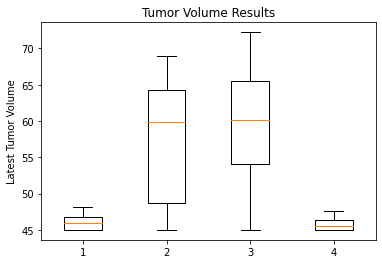

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

drug1 = capomulin["Tumor Volume (mm3)"]
drug2 = ceftamin["Tumor Volume (mm3)"]
drug3 = infubinol["Tumor Volume (mm3)"]
drug4 = ramicane["Tumor Volume (mm3)"]

green_diamond = dict(markerfacecolor='g', marker='D')
data = [drug1, drug2, drug3, drug4]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Results')
ax1.set_ylabel('Latest Tumor Volume')
ax1.boxplot(data, flierprops=green_diamond)

#fig1, ax1 = plt.subplots()
#ax1.set_title('Tumor Volume Results')
#ax1.set_ylabel('Latest Tumor Volume')
#ax1.boxplot(drug1)

#fig2, ax1 = plt.subplots()
#ax1.set_title('Ceftamin Tumor Volume Results')
#ax1.set_ylabel('Latest Tumor Volume')
#ax1.boxplot(drug2)

#fig3, ax1 = plt.subplots()
#ax1.set_title('Infubinol Tumor Volume Results')
#ax1.set_ylabel('Latest Tumor Volume')
#ax1.boxplot(drug3)

#fig4, ax1 = plt.subplots()
#ax1.set_title('Ramicane Tumor Volume Results')
#ax1.set_ylabel('Latest Tumor Volume')
#ax1.boxplot(drug4)
plt.show()

## Line and Scatter Plots

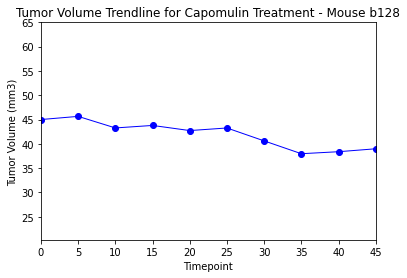

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Select and stage date for a single mouse trend line
trend2 = combined.loc[combined["Mouse ID"] == "b128"]
trend = trend2[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

# Plot a line chart on one mouse
x_lim = 45
x_axis = trend["Timepoint"]
y_axis = trend["Tumor Volume (mm3)"]

plt.title("Tumor Volume Trendline for Capomulin Treatment - Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(20.25, 65)

plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)
plt.show()

In [70]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

scatter = combined.loc[combined["Drug Regimen"] == "Capomulin"]
#scatter.head()
scattertwo = scatter.groupby(["Mouse ID"]).mean().rename(columns={"Weight (g)":"Average Weight", "Tumor Volume (mm3)":"Average Tumor Volume"})
#scattertwo.head()
xx_axis = scattertwo["Average Weight"]
#print(xx_axis)
yy_axis = scattertwo["Average Tumor Volume"]
#print(yy_axis)

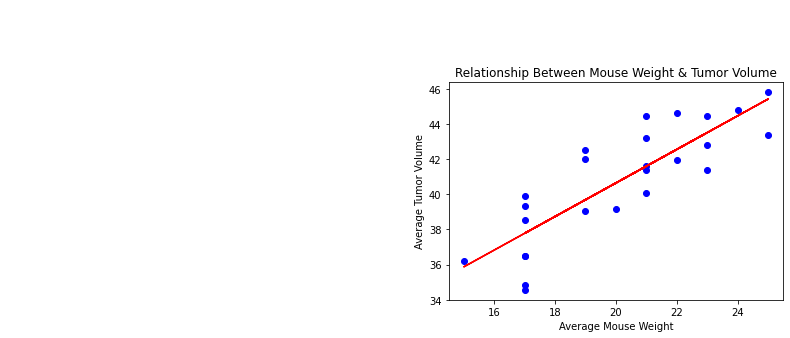

In [71]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
xx_axis = scattertwo["Average Weight"]
yy_axis = scattertwo["Average Tumor Volume"]
   
plt.title("Relationship Between Mouse Weight & Tumor Volume")
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.scatter(xx_axis, yy_axis, marker="o", color="blue")

(slope, intercept, rvalue, pvalue, stderr) = linregress(xx_axis, yy_axis)
regress_values = xx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(xx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.show()


## Correlation and Regression

In [72]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between average mouse weight and tumor volume is {round(st.pearsonr(xx_axis,yy_axis)[0],2)}")


The correlation coefficient between average mouse weight and tumor volume is 0.84


In [73]:
print("The line equation is as follows:")
print(line_eq)


The line equation is as follows:
y = 0.95x + 21.55
